In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = pd.read_csv('../Datasets/Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
iris.iloc[:,1:].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.iloc[:,1:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

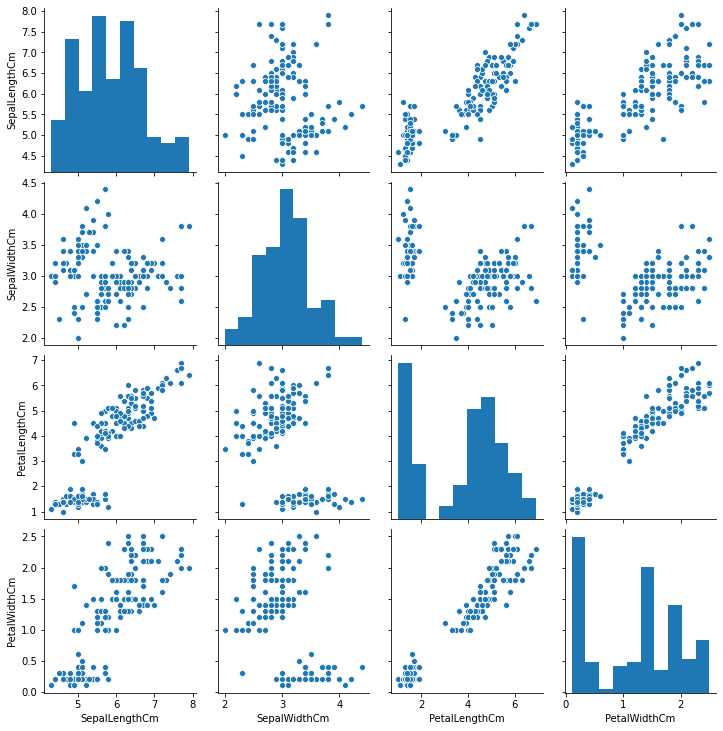

In [7]:
sns.pairplot(iris.iloc[:,1:])

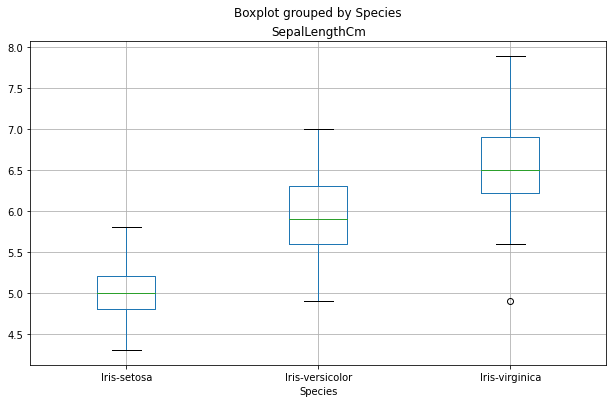

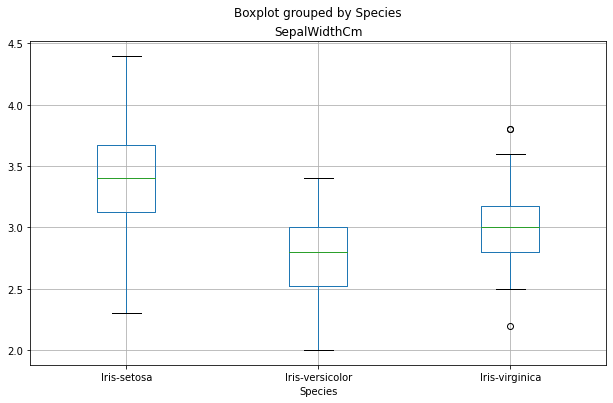

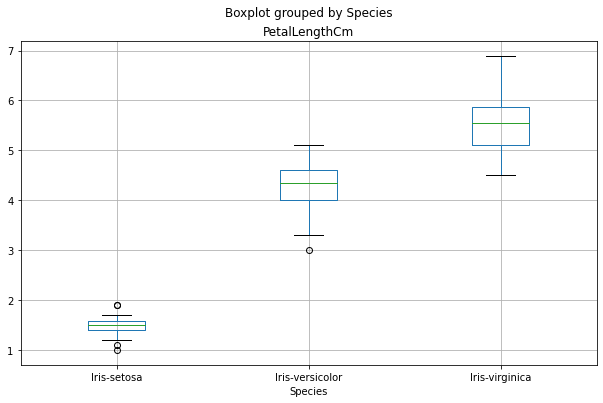

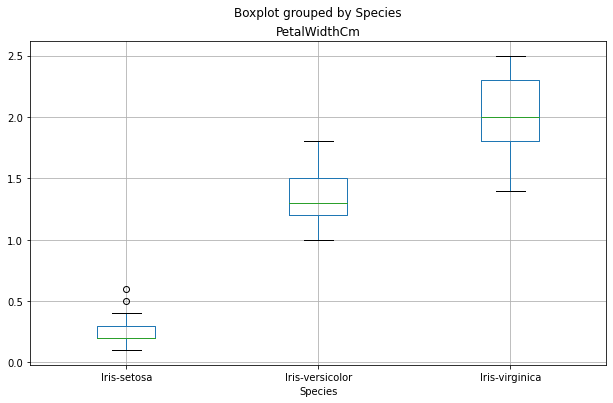

In [8]:
for i in iris.iloc[:,1:-1].columns:
    iris.boxplot(i,by="Species",figsize = [10,6])

# train-test split

In [9]:
X = iris.iloc[:,1:-1]
y = iris['Species']
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=10)

# Random Forest Classifier

In [11]:
rf = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    random_state=10
)
rf.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=10)

In [12]:
ypred = rf.predict(Xtest)

In [13]:
cm = confusion_matrix(ytest, ypred)
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 12]])

In [14]:
print("Test Accuracy = "+str(accuracy_score(ytest, ypred)*100)+"%")

Test Accuracy = 100.0%


In [15]:
ypred = rf.predict(Xtrain)

In [16]:
cm = confusion_matrix(ytrain, ypred)
cm

array([[39,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 38]])

In [17]:
print("Train Accuracy = "+str(accuracy_score(ytrain, ypred)*100)+"%")

Train Accuracy = 100.0%


In [18]:
score = rf.score(Xtest, ytest)
score

1.0

# Using PCA and Random Forests

In [19]:
pca = PCA(n_components=4)
pca.fit(Xtrain, ytrain)

PCA(n_components=4)

In [20]:
pca.explained_variance_ratio_

array([0.92361885, 0.05399453, 0.01743025, 0.00495637])

In [21]:
pca_new = PCA(n_components=2)

In [22]:
Xtrain_pca = pca_new.fit_transform(Xtrain)
Xtest_pca = pca_new.transform(Xtest)

In [23]:
rf = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    random_state=10
)
rf.fit(Xtrain_pca, ytrain)

RandomForestClassifier(random_state=10)

In [24]:
ypred = rf.predict(Xtest_pca)

In [25]:
cm = confusion_matrix(ytest, ypred)
cm

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 11]])

In [26]:
ypred = rf.predict(Xtrain_pca)

In [27]:
cm = confusion_matrix(ytrain, ypred)
cm

array([[39,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 38]])